In [23]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
%matplotlib inline

In [15]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [16]:
print("O dataset MNIST tem %d exemplos de treino" % len(X_train))
print("O dataset MNIST tem %d exemplos de teste" % len(X_test))

O dataset MNIST tem 60000 exemplos de treino
O dataset MNIST tem 10000 exemplos de teste


# Plotando algumas imagens

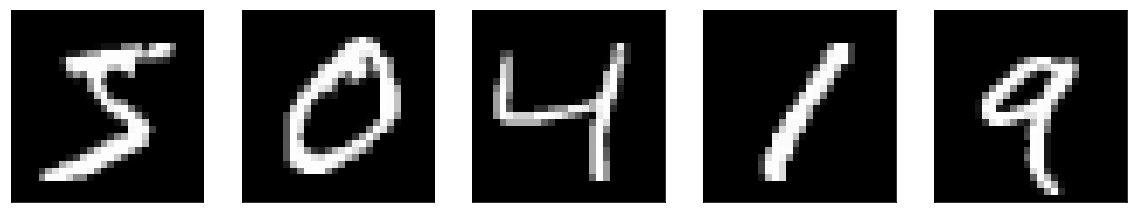

In [38]:
 fig = plt.figure(figsize=(20,20))
for i in range (5):
    im = fig.add_subplot(1, 5, i+1, xticks=[], yticks=[])
    im.imshow(X_train[i], cmap="gray")
